In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 4.8 MB/s 
     |████████████████████████████████| 212 kB 58.2 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 141 kB 74.2 MB/s 
     |████████████████████████████████| 275 kB 46.9 MB/s 
     |████████████████████████████████| 2.3 MB 46.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 68 kB 2.4 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 691 kB/s 
     |████████████████████████████████| 4.1 MB 43.1 

#Imports

In [4]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
# import splitfolders
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report
import gradio as gr
%matplotlib inline

In [5]:
!unzip gdrive/My\ Drive/output.zip

Streaming output truncated to the last 5000 lines.
  inflating: output/test/Apple/482.jpg  
  inflating: output/test/Apple/497.jpg  
  inflating: output/test/Apple/57.jpg  
  inflating: output/test/Apple/62.jpg  
  inflating: output/test/Apple/64.jpg  
  inflating: output/test/Apple/69.jpg  
  inflating: output/test/Apple/72.jpg  
  inflating: output/test/Apple/74.jpg  
  inflating: output/test/Apple/87.jpg  
   creating: output/test/Banana/
  inflating: output/test/Banana/106.jpg  
  inflating: output/test/Banana/128.jpg  
  inflating: output/test/Banana/148.jpg  
  inflating: output/test/Banana/152.jpg  
  inflating: output/test/Banana/174.jpg  
  inflating: output/test/Banana/192.jpg  
  inflating: output/test/Banana/24.jpg  
  inflating: output/test/Banana/241.jpg  
  inflating: output/test/Banana/251.jpg  
  inflating: output/test/Banana/259.jpg  
  inflating: output/test/Banana/260.jpg  
  inflating: output/test/Banana/264.jpg  
  inflating: output/test/Banana/266.jpg  
  inflati

# Data preprocessing

## Splitting the data

In [ ]:
# splitfolders.ratio('Fruit_Data', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [6]:
train_path='/content/output/train'
test_path='/content/output/test'
val_path='/content/output/val'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_directory(val_path,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory(test_path,
                                         target_size=(150,150),
                                         batch_size=32,
                                          class_mode='categorical')

Found 4001 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 510 images belonging to 10 classes.


In [7]:
label_map = (training_set.class_indices)
label_map

{'Apple': 0,
 'Banana': 1,
 'BlueBerry': 2,
 'Cherry': 3,
 'Grape': 4,
 'JackFruit': 5,
 'Mango': 6,
 'Orange': 7,
 'PineApple': 8,
 'Strawberry': 9}

In [8]:
fruit_list=list(label_map.keys())
fruit_list

['Apple',
 'Banana',
 'BlueBerry',
 'Cherry',
 'Grape',
 'JackFruit',
 'Mango',
 'Orange',
 'PineApple',
 'Strawberry']

# Comparing Models
We have to compare the following:

0. VGG 16
1. Inception
2. Xception
3. Resnet50

## 0. VGG16

In [ ]:
conv_base = keras.applications.VGG16(
    weights="imagenet",
      include_top=False,
    input_shape=(150, 150, 3))

inputs=keras.Input(shape=(150,150,3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_vgg16 = keras.Model(inputs, outputs)
model_vgg16.summary()    

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 150, 150, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.00001)

model_vgg16.compile(loss="categorical_crossentropy",
          optimizer=optimizer,
          metrics=["accuracy"])

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', 
              factor=np.sqrt(0.1),
              cooldown=0, 
              patience=5, 
              min_lr=1e-3)
history_vgg16=model_vgg16.fit(training_set,epochs=7,
                  batch_size=128,
                  validation_data=validation_set)


Epoch 1/7
126/126 [==============================] - 57s 316ms/step - loss: 2.6516 - accuracy: 0.0977 - val_loss: 2.3052 - val_accuracy: 0.0720
Epoch 2/7
126/126 [==============================] - 37s 292ms/step - loss: 2.3047 - accuracy: 0.0997 - val_loss: 2.3018 - val_accuracy: 0.1120
Epoch 3/7
126/126 [==============================] - 35s 274ms/step - loss: 2.3032 - accuracy: 0.1067 - val_loss: 2.3070 - val_accuracy: 0.0900
Epoch 4/7
126/126 [==============================] - 35s 275ms/step - loss: 2.3037 - accuracy: 0.1025 - val_loss: 2.3026 - val_accuracy: 0.0960
Epoch 5/7
126/126 [==============================] - 35s 275ms/step - loss: 2.3029 - accuracy: 0.0892 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/7
126/126 [==============================] - 36s 286ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1020
Epoch 7/7
126/126 [==============================] - 35s 277ms/step - loss: 2.3026 - accuracy: 0.0920 - val_loss: 2.3026 - val_accuracy:

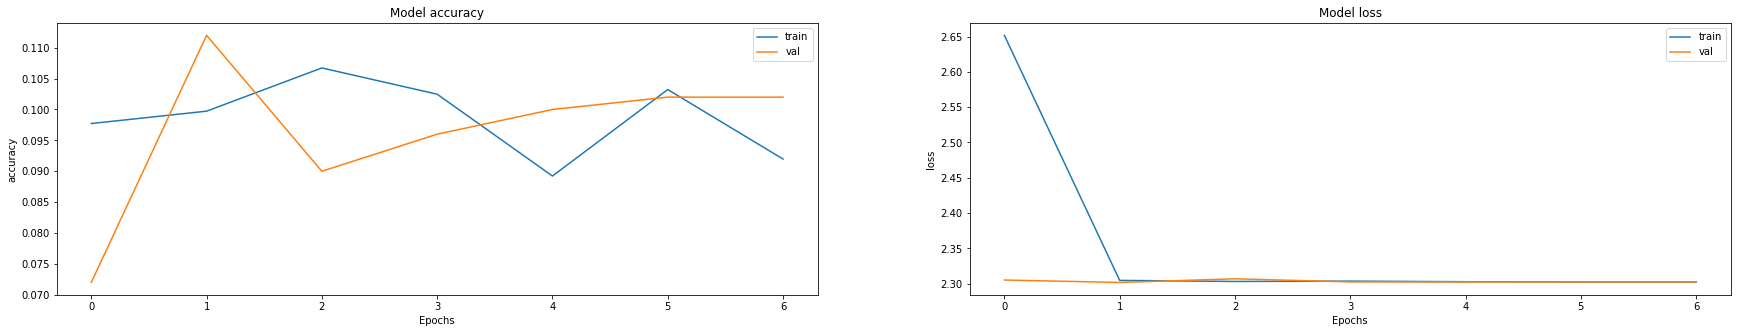

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history_vgg16.history[metric])
    ax[i].plot(history_vgg16.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

## 1. Inception

In [ ]:
conv_base = keras.applications.InceptionV3(
    weights="imagenet",
      include_top=False,
    input_shape=(150, 150, 3))

inputs=keras.Input(shape=(150,150,3))
x = keras.applications.inception_v3.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_inception = keras.Model(inputs, outputs)
model_inception.summary()    

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 150, 150, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                            

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.00001)

model_inception.compile(loss="categorical_crossentropy",
          optimizer=optimizer,
          metrics=["accuracy"])

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', 
              factor=np.sqrt(0.1),
              cooldown=0, 
              patience=5, 
              min_lr=1e-3)
history_inception=model_inception.fit(training_set,epochs=7,
                  batch_size=128,
                  validation_data=validation_set)


Epoch 1/7
126/126 [==============================] - 42s 264ms/step - loss: 2.2797 - accuracy: 0.2954 - val_loss: 2.4463 - val_accuracy: 0.1240
Epoch 2/7
126/126 [==============================] - 31s 249ms/step - loss: 1.3209 - accuracy: 0.5634 - val_loss: 2.2815 - val_accuracy: 0.1380
Epoch 3/7
126/126 [==============================] - 30s 238ms/step - loss: 1.0055 - accuracy: 0.6683 - val_loss: 1.8257 - val_accuracy: 0.4000
Epoch 4/7
126/126 [==============================] - 30s 236ms/step - loss: 0.8158 - accuracy: 0.7261 - val_loss: 0.9215 - val_accuracy: 0.7120
Epoch 5/7
126/126 [==============================] - 30s 237ms/step - loss: 0.6918 - accuracy: 0.7696 - val_loss: 0.5885 - val_accuracy: 0.8280
Epoch 6/7
126/126 [==============================] - 31s 247ms/step - loss: 0.6170 - accuracy: 0.7893 - val_loss: 0.4763 - val_accuracy: 0.8660
Epoch 7/7
126/126 [==============================] - 30s 236ms/step - loss: 0.5829 - accuracy: 0.8075 - val_loss: 0.4897 - val_accuracy:

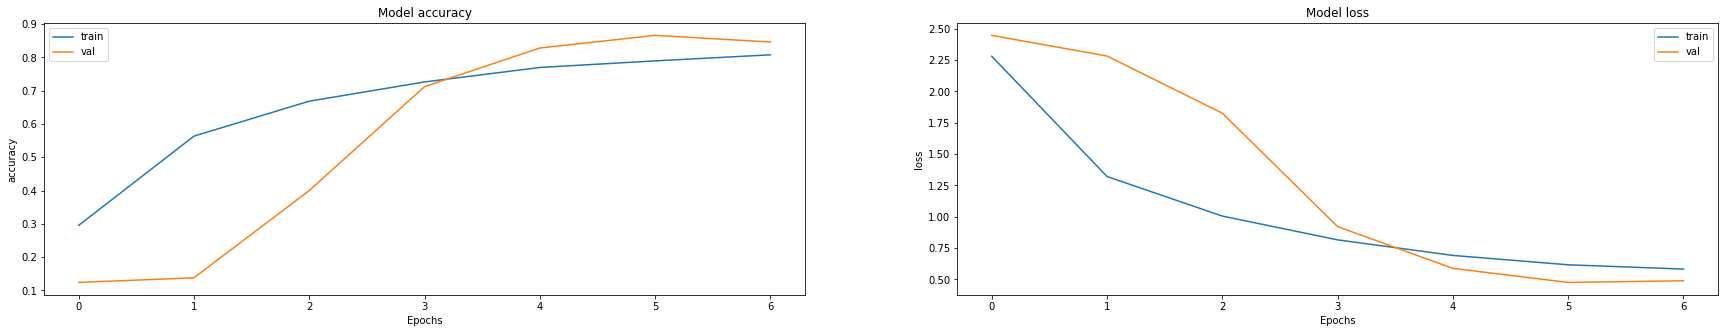

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history_inception.history[metric])
    ax[i].plot(history_inception.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

## 2. Xception

In [9]:
conv_base = keras.applications.Xception(
    weights="imagenet",
      include_top=False,
    input_shape=(150, 150, 3))

inputs=keras.Input(shape=(150,150,3))
x = keras.applications.xception.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_xception = keras.Model(inputs, outputs)
model_xception.summary()    

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 150, 150, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                              

In [10]:
optimizer=keras.optimizers.Adam(learning_rate=0.00001)

model_xception.compile(loss="categorical_crossentropy",
          optimizer=optimizer,
          metrics=["accuracy"])

In [11]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', 
              factor=np.sqrt(0.1),
              cooldown=0, 
              patience=5, 
              min_lr=1e-3)
history_xception=model_xception.fit(training_set,epochs=7,
                  batch_size=128,
                  validation_data=validation_set)


Epoch 1/7
126/126 [==============================] - 59s 325ms/step - loss: 1.4680 - accuracy: 0.5136 - val_loss: 2.3061 - val_accuracy: 0.1040
Epoch 2/7
126/126 [==============================] - 38s 304ms/step - loss: 0.7557 - accuracy: 0.7608 - val_loss: 2.3036 - val_accuracy: 0.1280
Epoch 3/7
126/126 [==============================] - 39s 312ms/step - loss: 0.5820 - accuracy: 0.8135 - val_loss: 1.8216 - val_accuracy: 0.4040
Epoch 4/7
126/126 [==============================] - 40s 316ms/step - loss: 0.4739 - accuracy: 0.8488 - val_loss: 0.7436 - val_accuracy: 0.7800
Epoch 5/7
126/126 [==============================] - 38s 301ms/step - loss: 0.3847 - accuracy: 0.8723 - val_loss: 0.3818 - val_accuracy: 0.8860
Epoch 6/7
126/126 [==============================] - 38s 299ms/step - loss: 0.3136 - accuracy: 0.8990 - val_loss: 0.2508 - val_accuracy: 0.9200
Epoch 7/7
126/126 [==============================] - 39s 310ms/step - loss: 0.2722 - accuracy: 0.9105 - val_loss: 0.2223 - val_accuracy:

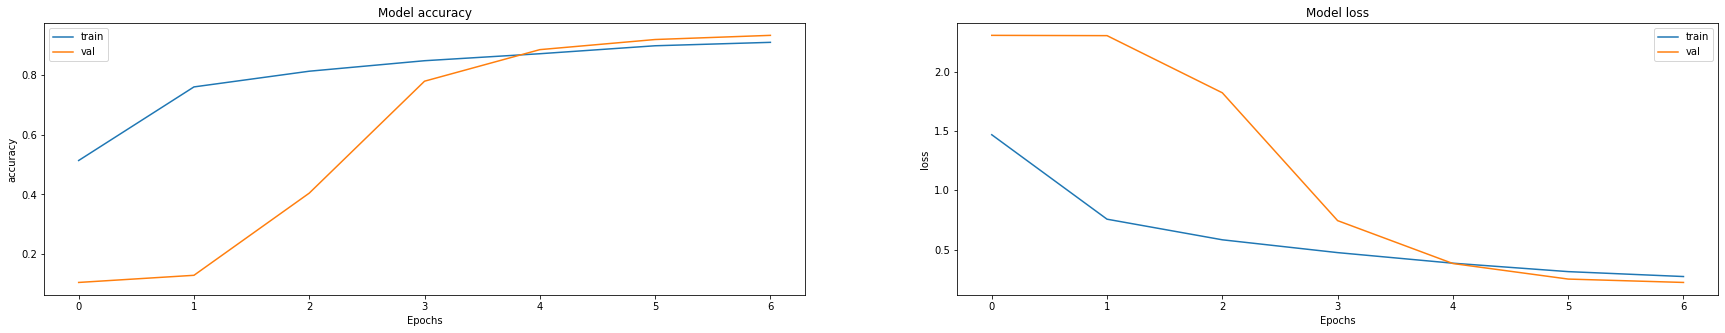

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history_xception.history[metric])
    ax[i].plot(history_xception.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

## 3. Resnet50

In [ ]:
conv_base = keras.applications.ResNet50(
    weights="imagenet",
      include_top=False,
    input_shape=(150, 150, 3))

inputs=keras.Input(shape=(150,150,3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_resnet50 = keras.Model(inputs, outputs)
model_resnet50.summary()    

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 150, 150, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                            

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.00001)

model_resnet50.compile(loss="categorical_crossentropy",
          optimizer=optimizer,
          metrics=["accuracy"])

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', 
              factor=np.sqrt(0.1),
              cooldown=0, 
              patience=5, 
              min_lr=1e-3)
history_resnet50=model_resnet50.fit(training_set,epochs=7,
                  batch_size=128,
                  validation_data=validation_set)


Epoch 1/7
126/126 [==============================] - 43s 281ms/step - loss: 3.4980 - accuracy: 0.3347 - val_loss: 4.4624 - val_accuracy: 0.1380
Epoch 2/7
126/126 [==============================] - 33s 264ms/step - loss: 1.9728 - accuracy: 0.5599 - val_loss: 5.0033 - val_accuracy: 0.1180
Epoch 3/7
126/126 [==============================] - 35s 277ms/step - loss: 1.5581 - accuracy: 0.6328 - val_loss: 5.9659 - val_accuracy: 0.1580
Epoch 4/7
126/126 [==============================] - 34s 268ms/step - loss: 1.3865 - accuracy: 0.6713 - val_loss: 5.4541 - val_accuracy: 0.2380
Epoch 5/7
126/126 [==============================] - 34s 266ms/step - loss: 1.1943 - accuracy: 0.7108 - val_loss: 4.4096 - val_accuracy: 0.2680
Epoch 6/7
126/126 [==============================] - 34s 267ms/step - loss: 1.0189 - accuracy: 0.7491 - val_loss: 1.9462 - val_accuracy: 0.5820
Epoch 7/7
126/126 [==============================] - 35s 277ms/step - loss: 0.8559 - accuracy: 0.7796 - val_loss: 1.1504 - val_accuracy:

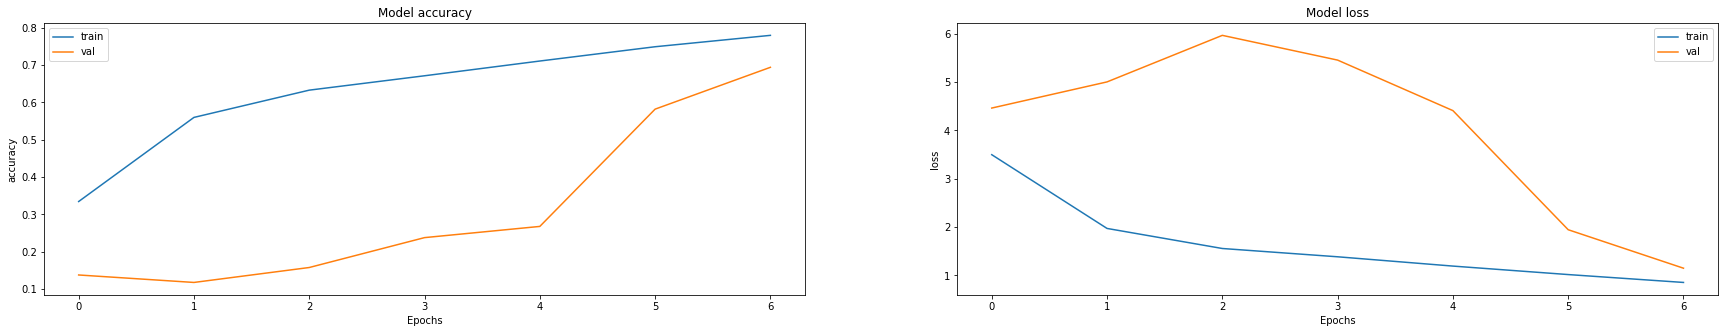

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history_resnet50.history[metric])
    ax[i].plot(history_resnet50.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

# Saving the best model

In [13]:
tf.keras.models.save_model(model_xception,'my_model_xception.hdf5')

# Deploying our model

In [ ]:
model = tf.keras.models.load_model('/content/my_model_xception.hdf5')


In [ ]:
def classify_image(inp):

  inp = inp.reshape((-1, 150, 150, 3))/255.0

  prediction = model.predict(inp)

  return fruit_list[int(np.argmax(prediction,axis=1))]

In [ ]:
demo=gr.Interface(fn=classify_image, 

             inputs=gr.Image(shape=(150, 150)),

             outputs="text")
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://18438.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f85b32d29d0>,
 'http://127.0.0.1:7860/',
 'https://18438.gradio.app')